In [ ]:
!pip install lightning
!pip install grad-cam
!pip install gradio

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
import zipfile

zip_file_path = '/content/gdrive/MyDrive/S13/archive.zip'

extract_path = '/content'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:

    zip_ref.extractall(extract_path)

In [ ]:
import torch
import torch.optim as optim
import lightning.pytorch as pl
# import pytorch_lightning as pl
from tqdm import tqdm
from model import YOLOv3
from utils import *
from loss import YoloLoss
# Create your config module or import it from the existing config.py file.
import config
from torch.optim.lr_scheduler import OneCycleLR
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from yolo_lightning import YOLOv3Lightning


In [ ]:
from lightning.pytorch.callbacks import ModelCheckpoint, LearningRateMonitor
from callbacks import plot_examples_callback, map_callback, class_accuracy_callback

model = YOLOv3Lightning(config=config)

trainer = pl.Trainer(precision=16, max_epochs=40,
                              callbacks=[ModelCheckpoint(dirpath="checkpoints/",verbose=True),
                              plot_examples_callback(epoch_interval=10),
                              class_accuracy_callback(train_epoch_interval=1, test_epoch_interval=10),
                              map_callback(epoch_interval=40),
                              LearningRateMonitor()])

INFO: You are using a CUDA device ('NVIDIA A100-SXM4-40GB') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
INFO:lightning.pytorch.utilities.rank_zero:You are using a CUDA device ('NVIDIA A100-SXM4-40GB') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "
INFO: `Trainer.fit` stopped: `max_steps=100` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=100` reached.
INFO: Learning rate set to 0.002754228703338169
INFO:lightning.pytorch.tuner.lr_finder:Learning rate set to 0.002754228703338169
INFO: Restoring states from the checkpoint path at /content/.lr_find_b575fdc3-b72b-4a95-bb4c-5fee7940b610.ckpt
INFO:lightning.pytorch.utilities.rank_zero:Restoring states from th

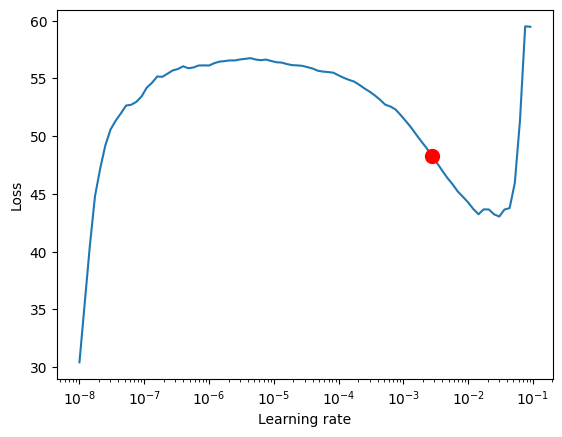

In [ ]:
from lightning.pytorch.tuner import Tuner
# Create a Tuner
tuner = Tuner(trainer)
# Finding the learning rate
lr_finder =tuner.lr_find(model)
fig = lr_finder.plot(suggest=True)
fig.show()
new_lr = lr_finder.suggestion()
# update hparams of the model
model.hparams.learning_rate = new_lr

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name    | Type     | Params
-------------------------------------
0 | model   | YOLOv3   | 61.6 M
1 | loss_fn | YoloLoss | 0     
-------------------------------------
61.6 M    Trainable params
0         Non-trainable params
61.6 M    Total params
246.506   Total estimated model params size (MB)


Yolo Model Trained on A100 GPU on Colab Pro by Adil Jaleel


INFO:lightning.pytorch.callbacks.model_summary:
  | Name    | Type     | Params
-------------------------------------
0 | model   | YOLOv3   | 61.6 M
1 | loss_fn | YoloLoss | 0     
-------------------------------------
61.6 M    Trainable params
0         Non-trainable params
61.6 M    Total params
246.506   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


Validation: 0it [00:00, ?it/s]

  0%|          | 0/1035 [00:00<?, ?it/s]

Logged on A100 GPU's Colab- Adil Jaleel
Epoch Number: 1
Train Metrics
Loss: 20.11150360107422
Class Accuracy: 34.070000%
No Object Accuracy: 99.800000%
Object Accuracy: 0.350000%


Validation: 0it [00:00, ?it/s]

  0%|          | 0/1035 [00:00<?, ?it/s]

Logged on A100 GPU's Colab- Adil Jaleel
Epoch Number: 2
Train Metrics
Loss: 12.551565170288086
Class Accuracy: 37.470000%
No Object Accuracy: 99.910000%
Object Accuracy: 2.890000%


Validation: 0it [00:00, ?it/s]

  0%|          | 0/1035 [00:00<?, ?it/s]

Logged on A100 GPU's Colab- Adil Jaleel
Epoch Number: 3
Train Metrics
Loss: 11.347396850585938
Class Accuracy: 40.430000%
No Object Accuracy: 97.420000%
Object Accuracy: 29.430000%


Validation: 0it [00:00, ?it/s]

  0%|          | 0/1035 [00:00<?, ?it/s]

Logged on A100 GPU's Colab- Adil Jaleel
Epoch Number: 4
Train Metrics
Loss: 10.443142890930176
Class Accuracy: 43.370000%
No Object Accuracy: 97.480000%
Object Accuracy: 42.050000%


Validation: 0it [00:00, ?it/s]

  0%|          | 0/1035 [00:00<?, ?it/s]

Logged on A100 GPU's Colab- Adil Jaleel
Epoch Number: 5
Train Metrics
Loss: 9.789111137390137
Class Accuracy: 46.410000%
No Object Accuracy: 97.270000%
Object Accuracy: 48.900000%


Validation: 0it [00:00, ?it/s]

  0%|          | 0/1035 [00:00<?, ?it/s]

Logged on A100 GPU's Colab- Adil Jaleel
Epoch Number: 6
Train Metrics
Loss: 9.416439056396484
Class Accuracy: 49.840000%
No Object Accuracy: 97.530000%
Object Accuracy: 52.020000%


Validation: 0it [00:00, ?it/s]

  0%|          | 0/1035 [00:00<?, ?it/s]

Logged on A100 GPU's Colab- Adil Jaleel
Epoch Number: 7
Train Metrics
Loss: 8.878873825073242
Class Accuracy: 51.950000%
No Object Accuracy: 97.450000%
Object Accuracy: 51.420000%


Validation: 0it [00:00, ?it/s]

  0%|          | 0/1035 [00:00<?, ?it/s]

Logged on A100 GPU's Colab- Adil Jaleel
Epoch Number: 8
Train Metrics
Loss: 8.519671440124512
Class Accuracy: 52.900000%
No Object Accuracy: 97.420000%
Object Accuracy: 54.100000%


Validation: 0it [00:00, ?it/s]

  0%|          | 0/1035 [00:00<?, ?it/s]

Logged on A100 GPU's Colab- Adil Jaleel
Epoch Number: 9
Train Metrics
Loss: 8.261908531188965
Class Accuracy: 54.750000%
No Object Accuracy: 97.420000%
Object Accuracy: 54.990000%


Validation: 0it [00:00, ?it/s]

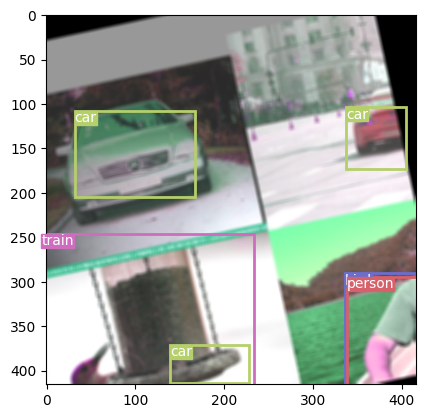

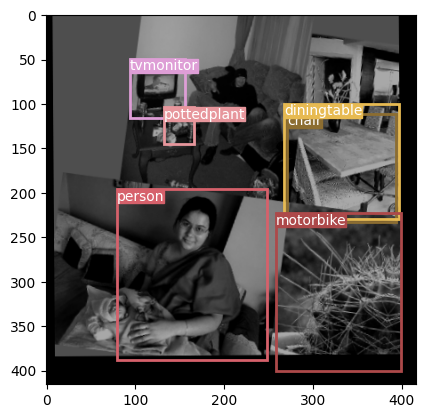

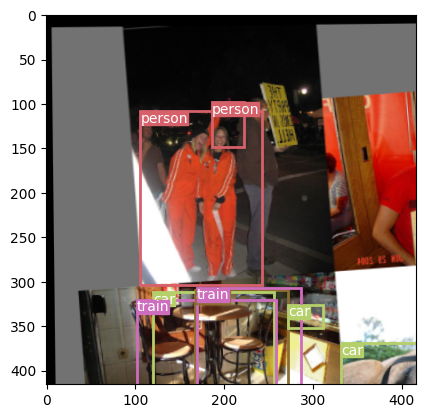

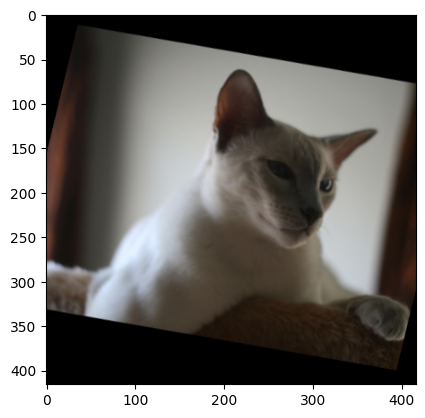

  0%|          | 0/1035 [00:00<?, ?it/s]

Logged on A100 GPU's Colab- Adil Jaleel
Epoch Number: 10
Train Metrics
Loss: 8.015399932861328
Class Accuracy: 56.470000%
No Object Accuracy: 97.280000%
Object Accuracy: 59.270000%


  0%|          | 0/310 [00:00<?, ?it/s]

Test Metrics
Class Accuracy: 64.830000%
No Object Accuracy: 97.420000%
Object Accuracy: 55.730000%


Validation: 0it [00:00, ?it/s]

  0%|          | 0/1035 [00:00<?, ?it/s]

Logged on A100 GPU's Colab- Adil Jaleel
Epoch Number: 11
Train Metrics
Loss: 7.748666286468506
Class Accuracy: 58.240000%
No Object Accuracy: 97.450000%
Object Accuracy: 60.410000%


Validation: 0it [00:00, ?it/s]

  0%|          | 0/1035 [00:00<?, ?it/s]

Logged on A100 GPU's Colab- Adil Jaleel
Epoch Number: 12
Train Metrics
Loss: 7.529696941375732
Class Accuracy: 58.990000%
No Object Accuracy: 97.730000%
Object Accuracy: 58.930000%


Validation: 0it [00:00, ?it/s]

  0%|          | 0/1035 [00:00<?, ?it/s]

Logged on A100 GPU's Colab- Adil Jaleel
Epoch Number: 13
Train Metrics
Loss: 7.349154949188232
Class Accuracy: 61.610000%
No Object Accuracy: 97.570000%
Object Accuracy: 62.610000%


Validation: 0it [00:00, ?it/s]

  0%|          | 0/1035 [00:00<?, ?it/s]

Logged on A100 GPU's Colab- Adil Jaleel
Epoch Number: 14
Train Metrics
Loss: 7.12621545791626
Class Accuracy: 62.850000%
No Object Accuracy: 97.640000%
Object Accuracy: 61.270000%


Validation: 0it [00:00, ?it/s]

  0%|          | 0/1035 [00:00<?, ?it/s]

Logged on A100 GPU's Colab- Adil Jaleel
Epoch Number: 15
Train Metrics
Loss: 6.8818039894104
Class Accuracy: 64.270000%
No Object Accuracy: 97.620000%
Object Accuracy: 63.470000%


Validation: 0it [00:00, ?it/s]

  0%|          | 0/1035 [00:00<?, ?it/s]

Logged on A100 GPU's Colab- Adil Jaleel
Epoch Number: 16
Train Metrics
Loss: 6.65287446975708
Class Accuracy: 65.980000%
No Object Accuracy: 97.460000%
Object Accuracy: 67.550000%


Validation: 0it [00:00, ?it/s]

  0%|          | 0/1035 [00:00<?, ?it/s]

Logged on A100 GPU's Colab- Adil Jaleel
Epoch Number: 17
Train Metrics
Loss: 6.449738025665283
Class Accuracy: 66.410000%
No Object Accuracy: 97.540000%
Object Accuracy: 66.330000%


Validation: 0it [00:00, ?it/s]

  0%|          | 0/1035 [00:00<?, ?it/s]

Logged on A100 GPU's Colab- Adil Jaleel
Epoch Number: 18
Train Metrics
Loss: 6.2905449867248535
Class Accuracy: 68.530000%
No Object Accuracy: 97.620000%
Object Accuracy: 67.740000%


Validation: 0it [00:00, ?it/s]

  0%|          | 0/1035 [00:00<?, ?it/s]

Logged on A100 GPU's Colab- Adil Jaleel
Epoch Number: 19
Train Metrics
Loss: 6.135333061218262
Class Accuracy: 68.910000%
No Object Accuracy: 97.590000%
Object Accuracy: 69.300000%


Validation: 0it [00:00, ?it/s]

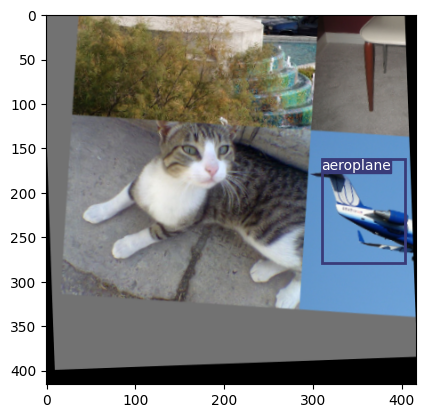

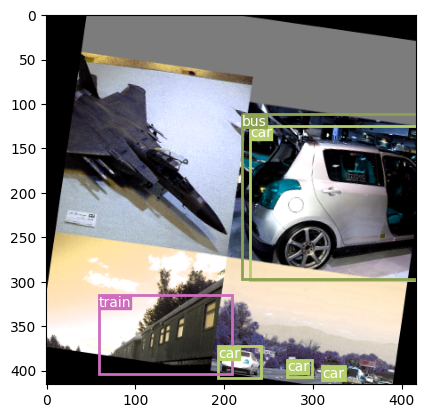

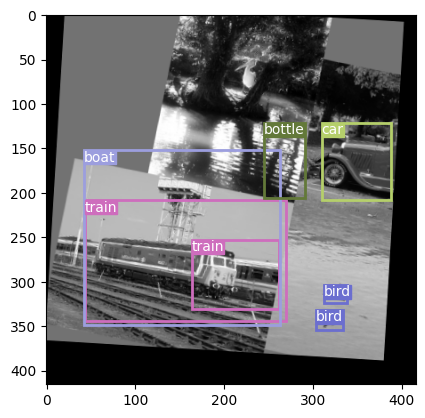

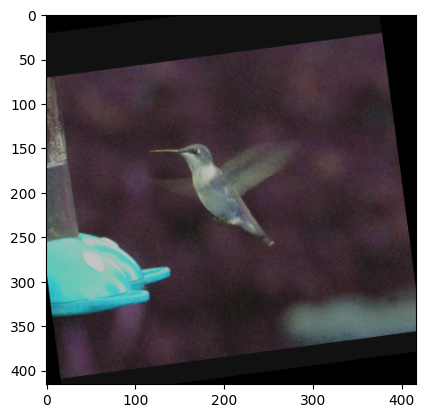

  0%|          | 0/1035 [00:00<?, ?it/s]

Logged on A100 GPU's Colab- Adil Jaleel
Epoch Number: 20
Train Metrics
Loss: 6.040356636047363
Class Accuracy: 68.740000%
No Object Accuracy: 97.630000%
Object Accuracy: 69.150000%


  0%|          | 0/310 [00:00<?, ?it/s]

Test Metrics
Class Accuracy: 75.970000%
No Object Accuracy: 97.620000%
Object Accuracy: 67.640000%


Validation: 0it [00:00, ?it/s]

  0%|          | 0/1035 [00:00<?, ?it/s]

Logged on A100 GPU's Colab- Adil Jaleel
Epoch Number: 21
Train Metrics
Loss: 5.80633544921875
Class Accuracy: 71.440000%
No Object Accuracy: 97.680000%
Object Accuracy: 70.470000%


Validation: 0it [00:00, ?it/s]

  0%|          | 0/1035 [00:00<?, ?it/s]

Logged on A100 GPU's Colab- Adil Jaleel
Epoch Number: 22
Train Metrics
Loss: 5.7102460861206055
Class Accuracy: 71.860000%
No Object Accuracy: 97.730000%
Object Accuracy: 71.960000%


Validation: 0it [00:00, ?it/s]

  0%|          | 0/1035 [00:00<?, ?it/s]

Logged on A100 GPU's Colab- Adil Jaleel
Epoch Number: 23
Train Metrics
Loss: 5.57144832611084
Class Accuracy: 73.470000%
No Object Accuracy: 97.750000%
Object Accuracy: 71.520000%


Validation: 0it [00:00, ?it/s]

  0%|          | 0/1035 [00:00<?, ?it/s]

Logged on A100 GPU's Colab- Adil Jaleel
Epoch Number: 24
Train Metrics
Loss: 5.44853401184082
Class Accuracy: 73.610000%
No Object Accuracy: 97.630000%
Object Accuracy: 72.390000%


Validation: 0it [00:00, ?it/s]

  0%|          | 0/1035 [00:00<?, ?it/s]

Logged on A100 GPU's Colab- Adil Jaleel
Epoch Number: 25
Train Metrics
Loss: 5.253989219665527
Class Accuracy: 74.830000%
No Object Accuracy: 97.670000%
Object Accuracy: 72.850000%


Validation: 0it [00:00, ?it/s]

  0%|          | 0/1035 [00:00<?, ?it/s]

Logged on A100 GPU's Colab- Adil Jaleel
Epoch Number: 26
Train Metrics
Loss: 5.180441856384277
Class Accuracy: 75.720000%
No Object Accuracy: 97.760000%
Object Accuracy: 72.900000%


Validation: 0it [00:00, ?it/s]

  0%|          | 0/1035 [00:00<?, ?it/s]

Logged on A100 GPU's Colab- Adil Jaleel
Epoch Number: 27
Train Metrics
Loss: 5.042975902557373
Class Accuracy: 76.380000%
No Object Accuracy: 97.830000%
Object Accuracy: 73.340000%


Validation: 0it [00:00, ?it/s]

  0%|          | 0/1035 [00:00<?, ?it/s]

Logged on A100 GPU's Colab- Adil Jaleel
Epoch Number: 28
Train Metrics
Loss: 4.904078483581543
Class Accuracy: 77.140000%
No Object Accuracy: 97.780000%
Object Accuracy: 74.460000%


Validation: 0it [00:00, ?it/s]

  0%|          | 0/1035 [00:00<?, ?it/s]

Logged on A100 GPU's Colab- Adil Jaleel
Epoch Number: 29
Train Metrics
Loss: 4.801987171173096
Class Accuracy: 78.410000%
No Object Accuracy: 97.920000%
Object Accuracy: 74.180000%


Validation: 0it [00:00, ?it/s]

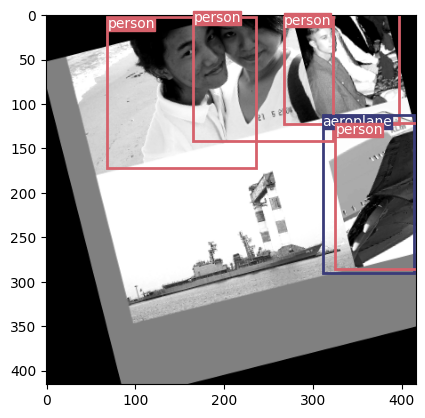

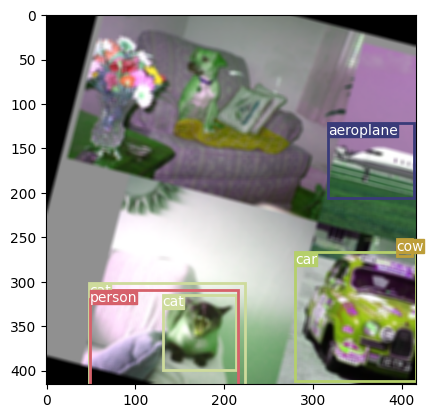

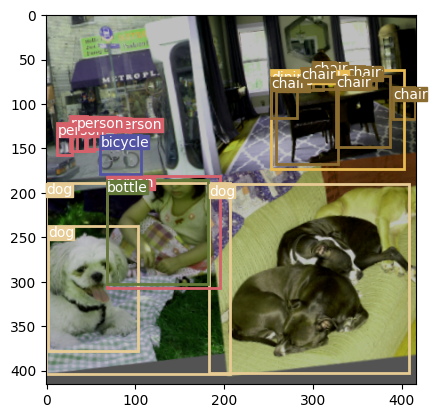

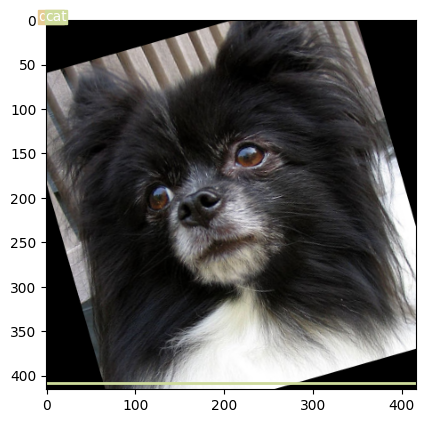

  0%|          | 0/1035 [00:00<?, ?it/s]

Logged on A100 GPU's Colab- Adil Jaleel
Epoch Number: 30
Train Metrics
Loss: 4.681326389312744
Class Accuracy: 79.100000%
No Object Accuracy: 97.990000%
Object Accuracy: 74.470000%


  0%|          | 0/310 [00:00<?, ?it/s]

Test Metrics
Class Accuracy: 83.760000%
No Object Accuracy: 98.000000%
Object Accuracy: 73.230000%


Validation: 0it [00:00, ?it/s]

  0%|          | 0/1035 [00:00<?, ?it/s]

Logged on A100 GPU's Colab- Adil Jaleel
Epoch Number: 31
Train Metrics
Loss: 4.571375370025635
Class Accuracy: 80.150000%
No Object Accuracy: 97.930000%
Object Accuracy: 75.980000%


Validation: 0it [00:00, ?it/s]

  0%|          | 0/1035 [00:00<?, ?it/s]

Logged on A100 GPU's Colab- Adil Jaleel
Epoch Number: 32
Train Metrics
Loss: 4.455683708190918
Class Accuracy: 80.090000%
No Object Accuracy: 97.950000%
Object Accuracy: 75.720000%


Validation: 0it [00:00, ?it/s]

  0%|          | 0/1035 [00:00<?, ?it/s]

Logged on A100 GPU's Colab- Adil Jaleel
Epoch Number: 33
Train Metrics
Loss: 4.345999717712402
Class Accuracy: 81.830000%
No Object Accuracy: 97.930000%
Object Accuracy: 76.820000%


Validation: 0it [00:00, ?it/s]

  0%|          | 0/1035 [00:00<?, ?it/s]

Logged on A100 GPU's Colab- Adil Jaleel
Epoch Number: 34
Train Metrics
Loss: 4.213000297546387
Class Accuracy: 82.020000%
No Object Accuracy: 97.980000%
Object Accuracy: 77.010000%


Validation: 0it [00:00, ?it/s]

  0%|          | 0/1035 [00:00<?, ?it/s]

Logged on A100 GPU's Colab- Adil Jaleel
Epoch Number: 35
Train Metrics
Loss: 4.105185031890869
Class Accuracy: 82.910000%
No Object Accuracy: 98.140000%
Object Accuracy: 76.800000%


Validation: 0it [00:00, ?it/s]

  0%|          | 0/1035 [00:00<?, ?it/s]

Logged on A100 GPU's Colab- Adil Jaleel
Epoch Number: 36
Train Metrics
Loss: 4.0255584716796875
Class Accuracy: 83.750000%
No Object Accuracy: 98.040000%
Object Accuracy: 77.740000%


Validation: 0it [00:00, ?it/s]

  0%|          | 0/1035 [00:00<?, ?it/s]

Logged on A100 GPU's Colab- Adil Jaleel
Epoch Number: 37
Train Metrics
Loss: 3.938584089279175
Class Accuracy: 84.130000%
No Object Accuracy: 98.110000%
Object Accuracy: 77.830000%


Validation: 0it [00:00, ?it/s]

  0%|          | 0/1035 [00:00<?, ?it/s]

Logged on A100 GPU's Colab- Adil Jaleel
Epoch Number: 38
Train Metrics
Loss: 3.8126344680786133
Class Accuracy: 84.570000%
No Object Accuracy: 98.110000%
Object Accuracy: 78.310000%


Validation: 0it [00:00, ?it/s]

  0%|          | 0/1035 [00:00<?, ?it/s]

Logged on A100 GPU's Colab- Adil Jaleel
Epoch Number: 39
Train Metrics
Loss: 3.742509126663208
Class Accuracy: 85.360000%
No Object Accuracy: 98.140000%
Object Accuracy: 78.490000%


Validation: 0it [00:00, ?it/s]

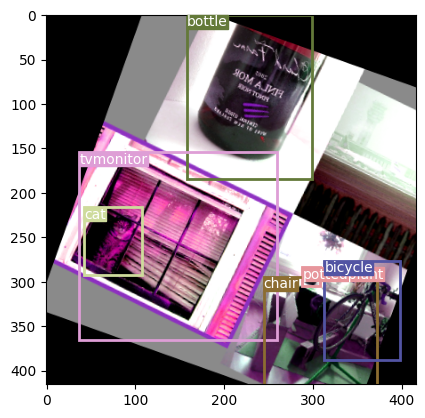

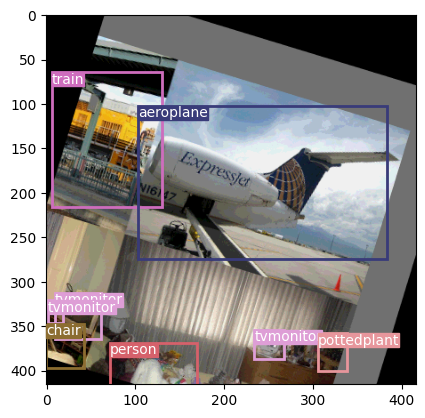

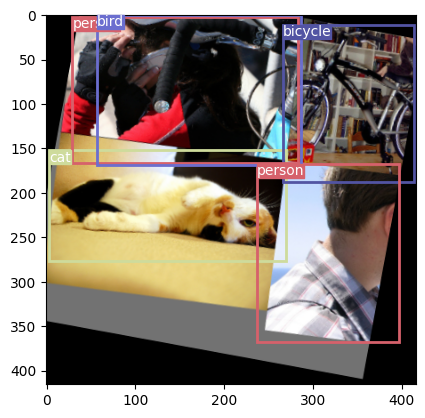

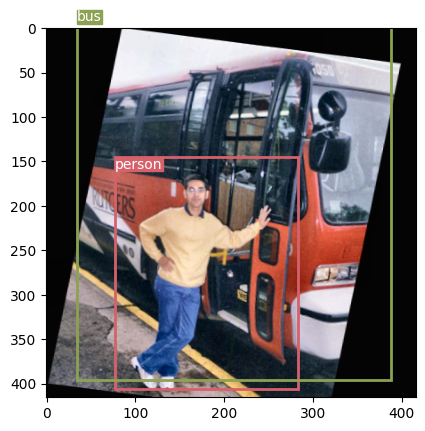

  0%|          | 0/1035 [00:00<?, ?it/s]

Logged on A100 GPU's Colab- Adil Jaleel
Epoch Number: 40
Train Metrics
Loss: 3.670590877532959
Class Accuracy: 85.670000%
No Object Accuracy: 98.120000%
Object Accuracy: 78.880000%


  0%|          | 0/310 [00:00<?, ?it/s]

Test Metrics
Class Accuracy: 87.180000%
No Object Accuracy: 98.230000%
Object Accuracy: 75.690000%


  0%|          | 0/310 [00:00<?, ?it/s]

MAP:  0.4017103314399719


INFO: `Trainer.fit` stopped: `max_epochs=40` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=40` reached.


In [ ]:
# trainer = pl.Trainer(precision=16,max_epochs=1)
print("Yolo Model Trained on A100 GPU on Colab Pro by Adil Jaleel")
trainer.fit(model)

In [ ]:
trainer.test()

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:148: UserWarning: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
  rank_zero_warn(
INFO: Restoring states from the checkpoint path at /content/checkpoints/epoch=39-step=41400.ckpt
INFO:lightning.pytorch.utilities.rank_zero:Restoring states from the checkpoint path at /content/checkpoints/epoch=39-step=41400.ckpt
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: Loaded model weights from the checkpoint at /content/checkpoints/epoch=39-step=41400.ckpt
INFO:lightning.pytorch.utilities.rank_zero:Loaded model weights from the checkpoint at /content/checkpoints/epoch=39-step=41400.ckpt

Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│      test_loss_epoch      │     4.01169490814209      │
└───────────────────────────┴───────────────────────────┘

[{'test_loss_epoch': 4.01169490814209}]

In [ ]:
# start tensorboard
%load_ext tensorboard
%tensorboard --logdir lightning_logs/

In [ ]:
"""# # # Save the model
torch.save(model.state_dict(), "custom_yolo_model.pth")

!cp custom_yolo_model.pth gdrive/MyDrive/S13/"""

In [ ]:
### Gradio

In [ ]:
import torch
import torch.optim as optim
import lightning.pytorch as pl
from lightning.pytorch.tuner import Tuner
from tqdm import tqdm
from torch.optim.lr_scheduler import OneCycleLR
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import albumentations as A
from pytorch_grad_cam.utils.image import show_cam_on_image
from albumentations.pytorch import ToTensorV2
import config
from yolo_lightning import YOLOv3Lightning
import torch
import cv2
import numpy as np
import gradio as gr
import os
from utils_app import *

model = YOLOv3Lightning (config)

model.load_state_dict(torch.load("/content/gdrive/MyDrive/S13/custom_yolo_model.pth",  map_location=torch.device('cpu')), strict=False)
model.setup(stage="test")

IMAGE_SIZE = 416

ANCHORS = [
    [(0.28, 0.22), (0.38, 0.48), (0.9, 0.78)],
    [(0.07, 0.15), (0.15, 0.11), (0.14, 0.29)],
    [(0.02, 0.03), (0.04, 0.07), (0.08, 0.06)],
]  # Note these have been rescaled to be between [0, 1]
S = [IMAGE_SIZE // 32, IMAGE_SIZE // 16, IMAGE_SIZE // 8]

scaled_anchors = (
    torch.tensor(config.ANCHORS)
    * torch.tensor(config.S).unsqueeze(1).unsqueeze(1).repeat(1, 3, 2)
)

def process_image_and_plot(image, model, scaled_anchors):

    transformed_image = config.transforms(image=image)["image"].unsqueeze(0)
    output = model(transformed_image)
    bboxes = [[] for _ in range(1)]

    for i in range(3):
        batch_size, A, S, _, _ = output[i].shape
        anchor = scaled_anchors[i]
        boxes_scale_i = cells_to_bboxes(output[i], anchor, S=S, is_preds=True)
        for idx, box in enumerate(boxes_scale_i):
            bboxes[idx] += box

    nms_boxes = non_max_suppression(
        bboxes[0], iou_threshold=0.5, threshold=0.4, box_format="midpoint",
    )
    fig = plot_image(transformed_image[0].permute(1, 2, 0), nms_boxes)

    cam = YoloCAM(model=model, target_layers=[model.model.layers[-2]], use_cuda=False)
    grayscale_cam = cam(transformed_image, scaled_anchors)[0, :, :]
    img = cv2.resize(image, (416, 416))
    img = np.float32(img) / 255
    cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)

    return fig,cam_image


"""examples = [
    ["images/cycle.jpg"],
    ["images/human.jpg"],
    ["images/automobile.jpg"],
]"""

def processed_image(image):
    figure,gradcam = process_image_and_plot(image, model, scaled_anchors)
    return figure,gradcam

title = "YoloV3 on Pascal VOC Dataset with GradCAM"
description = "Pytorch Lightening Implemetation of YoloV3 trained from scratch"
demo = gr.Interface(processed_image,
    inputs=[
        gr.Image(label="Input Image"),
    ],
    outputs=[gr.Plot(),gr.Image(shape=(32, 32), label="Model Prediction")],
    title=title,
    description=description,
   # examples=examples,
)
demo.launch(share=True,debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://7eeedb29670758c551.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
